# **Computação Visual**
*Prof. André Kishimoto*

**Observação**: Os exercícios da semana estão no final deste *notebook*!

## **Transformada de Fourier (FT) e filtros no domínio da frequência com `NumPy`**

Nesta semana, usaremos a biblioteca `NumPy` para realizar a Transformada de Fourier (FT) em imagens, aplicar filtros no domínio da frequência e realizar a Transformada Inversa de Fourier.

O `NumPy` possui um módulo chamado `FFT` para realizar operações envolvendo a Transformada de Fourier (FFT = *Fast Fourier Transform*).

A função `np.fft.fft2()` é usada para fazer a transformação de uma imagem, do domínio espacial para o domínio da frequência. Geralmente, a FT de uma função real é um valor complexo (possui componente real e imaginário). Assim, o retorno de `np.fft.fft2()` é um array do tipo `complex` (real + imag*1j).

Para visualização, trabalhamos com a magnitude (abs) da FT, sendo que temos o espectro da frequência ou espectro de Fourier e o ângulo de fase.

No caso de imagens, a versão 2D da Transformada Discreta de Fourier (DFT = *Discrete Fourier Transform*) é usada para encontrar o domínio da frequência. Internamente, as bibliotecas implementam a DFT com FFT, por ser um algoritmo mais eficiente e rápido - DFT O(n^2) vs FFT O(n log n).

Antes de aplicarmos um filtro no domínio da frequência, vamos ver um passo a passo das etapas que geralmente realizamos com a FT:

1. Obter a imagem de entrada, em tons de cinza, seja de um arquivo de imagem ou gerado proceduralmente.
1. Converter a imagem para o domínio da frequência (aplicar a FT).
1. Fazer um deslocamento, centralizando o componente DC (frequência zero / baixa frequência), que estava no canto superior esquerdo da imagem transformada.
1. Realizar uma transformação logarítmica para realçar detalhes do espectro.
1. Aplicar filtro no domínio da frequência.
1. Fazer o deslocamento inverso, voltando o componente DC para o canto superior esquerdo da imagem.
1. Fazer a transformada inversa de Fourier, obtendo a imagem original filtrada.

O trecho de código a seguir realiza as quatro primeiras etapas listadas no parágrafo anterior, sendo que a imagem de entrada é gerada proceduralmente (via código).

Usamos `np.abs()` no array complexo obtido pelo `np.fft.fft2()` para obter a amplitude. Para a fase, podemos usar `np.angle()`.

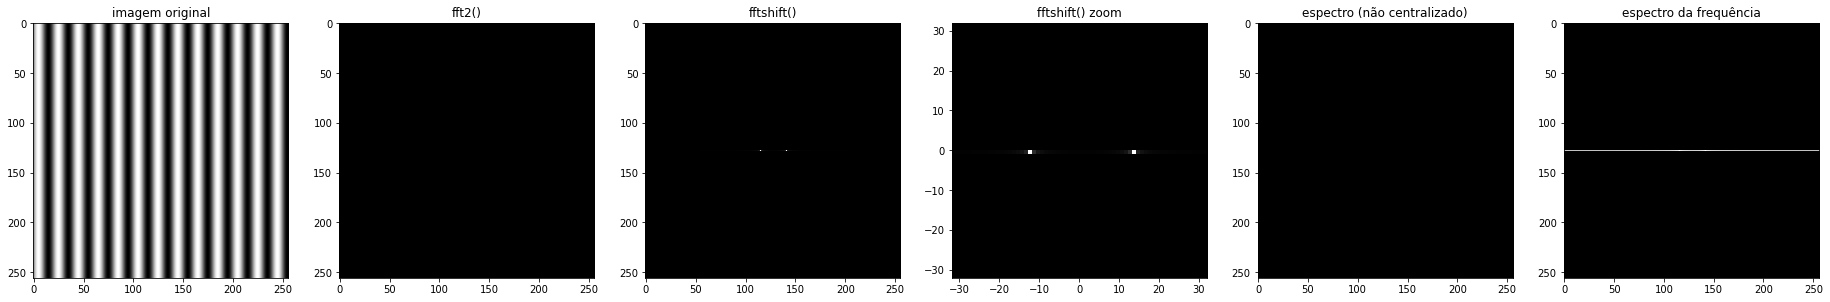

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tamanho da imagem.
width = 128
height = 128

# Período da senóide.
frequency = 12.8

# Usado para exibir a imagem transformada ampliada.
zoom = 32

# Usado para evitar divisão por zero na transformação logarítmica.
epsilon = 0.000001

# Cria uma imagem de tamanho (2 * width, 2 * height) com período frequency na direção horizontal.
rows = np.linspace(0, 1, 2 * height)
cols = np.linspace(0, 1, 2 * width)
[x, y] = np.meshgrid(cols, rows)
img = np.sin(frequency * 2 * np.pi * x)

# Converte a imagem para o domínio da frequência (aplica a transformada de Fourier).
fourier = np.fft.fft2(img)

# Centraliza o componente DC, que estava no canto superior esquerdo.
shift = np.fft.fftshift(fourier)

# Transformação logarítmica para obter uma imagem com todas as frequências (espectro da frequência).
# epsilon é usado para evitar divisão por zero.
spectrum_noshift = np.log(np.abs(fourier) + epsilon)
spectrum = np.log(np.abs(shift) + epsilon)

# Exibe as imagens.
fig, axs = plt.subplots(1, 6, figsize=(32, 32))
axs[0].set_title('imagem original')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('fft2()')
axs[1].imshow(np.abs(fourier), cmap=plt.cm.gray)
axs[2].set_title('fftshift()')
axs[2].imshow(np.abs(shift), cmap=plt.cm.gray)
axs[3].set_title('fftshift() zoom')
axs[3].imshow(np.abs(shift)[height-zoom:height+zoom, width-zoom:width+zoom], extent=[-zoom, zoom, -zoom, zoom], cmap=plt.cm.gray)
axs[4].set_title('espectro (não centralizado)')
axs[4].imshow(spectrum_noshift, cmap=plt.cm.gray)
axs[5].set_title('espectro da frequência')
axs[5].imshow(spectrum, cmap=plt.cm.gray)
plt.show()

No próximo exemplo, a imagem de entrada possui uma repetição na direção vertical.

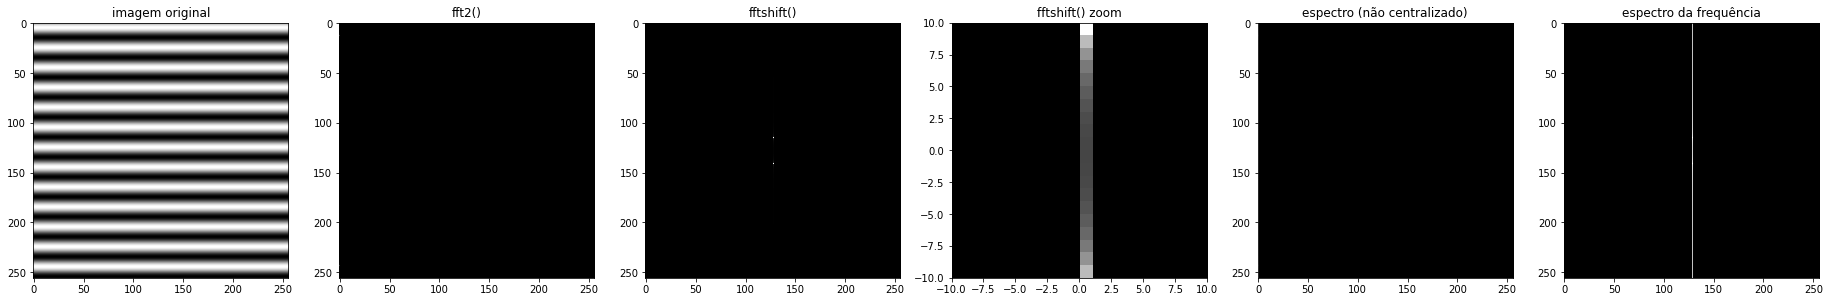

In [4]:
import numpy as np
import matplotlib.pyplot as plt

width = 128
height = 128
frequency = 12.8
zoom = 10
epsilon = 0.000001

# Cria uma imagem de tamanho (2 * width, 2 * height) com período frequency na direção vertical.
rows = np.linspace(0, 1, 2 * height)
cols = np.linspace(0, 1, 2 * width)
[x, y] = np.meshgrid(cols, rows)
img = np.sin(frequency * 2 * np.pi * y)

# Converte a imagem para o domínio da frequência (aplica a transformada de Fourier).
fourier = np.fft.fft2(img)

# Centraliza o componente DC, que estava no canto superior esquerdo.
shift = np.fft.fftshift(fourier)

# Transformação logarítmica para obter uma imagem com todas as frequências (espectro da frequência).
# epsilon é usado para evitar divisão por zero.
spectrum_noshift = np.log(np.abs(fourier) + epsilon)
spectrum = np.log(np.abs(shift) + epsilon)

# Exibe as imagens.
fig, axs = plt.subplots(1, 6, figsize=(32, 32))
axs[0].set_title('imagem original')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('fft2()')
axs[1].imshow(np.abs(fourier), cmap=plt.cm.gray)
axs[2].set_title('fftshift()')
axs[2].imshow(np.abs(shift), cmap=plt.cm.gray)
axs[3].set_title('fftshift() zoom')
axs[3].imshow(np.abs(shift)[height-zoom:height+zoom, width-zoom:width+zoom], extent=[-zoom, zoom, -zoom, zoom], cmap=plt.cm.gray)
axs[4].set_title('espectro (não centralizado)')
axs[4].imshow(spectrum_noshift, cmap=plt.cm.gray)
axs[5].set_title('espectro da frequência')
axs[5].imshow(spectrum, cmap=plt.cm.gray)
plt.show()

A seguir, uma imagem com periodicidade na diagonal, idem à imagem anterior, mas rotacionada em -45º.

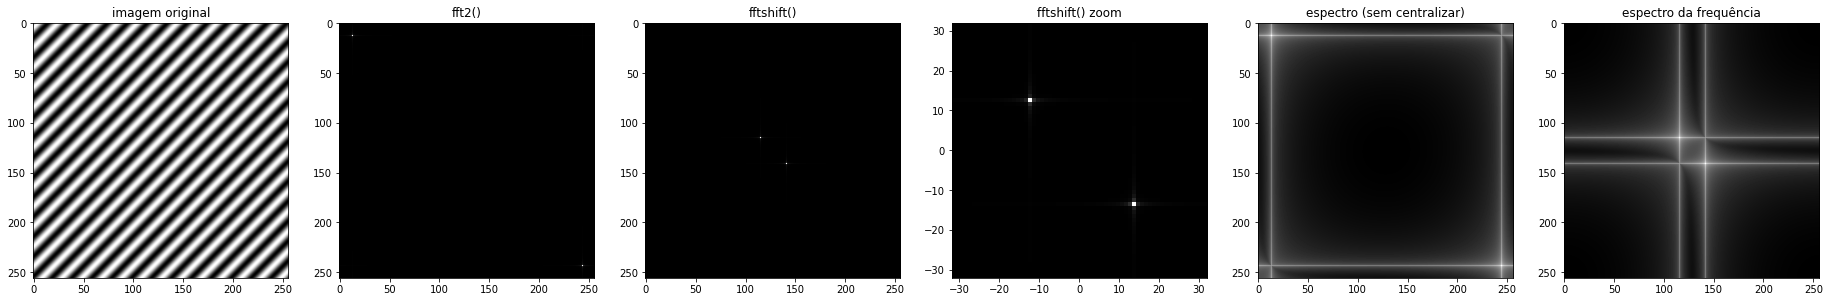

In [3]:
import numpy as np
import matplotlib.pyplot as plt

width = 128
height = 128
freqH = 12.8
freqV = 12.8
zoom = 32
epsilon = 0.000001

# Cria uma imagem de tamanho (2 * width, 2 * height) com períodos freqH e freqV na diagonal.
rows = np.linspace(0, 1, 2 * height)
cols = np.linspace(0, 1, 2 * width)
[x, y] = np.meshgrid(cols, rows)
img = np.sin(freqH * 2 * np.pi * x + freqV * 2 * np.pi * y)

# Converte a imagem para o domínio da frequência (aplica a transformada de Fourier).
fourier = np.fft.fft2(img)

# Centraliza o componente DC, que estava no canto superior esquerdo.
shift = np.fft.fftshift(fourier)

# Transformação logarítmica para obter uma imagem com todas as frequências (espectro da frequência).
# epsilon é usado para evitar divisão por zero.
spectrum_noshift = np.log(np.abs(fourier) + epsilon)
spectrum = np.log(np.abs(shift) + epsilon)

# Exibe as imagens.
fig, axs = plt.subplots(1, 6, figsize=(32, 32))
axs[0].set_title('imagem original')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('fft2()')
axs[1].imshow(np.abs(fourier), cmap=plt.cm.gray)
axs[2].set_title('fftshift()')
axs[2].imshow(np.abs(shift), cmap=plt.cm.gray)
axs[3].set_title('fftshift() zoom')
axs[3].imshow(np.abs(shift)[height-zoom:height+zoom, width-zoom:width+zoom], extent=[-zoom, zoom, -zoom, zoom], cmap=plt.cm.gray)
axs[4].set_title('espectro (sem centralizar)')
axs[4].imshow(spectrum_noshift, cmap=plt.cm.gray)
axs[5].set_title('espectro da frequência')
axs[5].imshow(spectrum, cmap=plt.cm.gray)
plt.show()

No espectro do exemplo anterior, temos padrões horizontais e verticais que parecem que não deveriam existir. Porém, o espectro é resultado da periodicidade: ao repetir a imagem de entrada original, podemos encontrar as arestas que causam os padrões horizontais e verticais no domínio da frequência:

![periodicidade.png](periodicidade.png)

Para diminuir esse efeito, podemos realizar uma operação de janelamento (*windowing*), como no código a seguir, em que criamos uma imagem gaussiana e a multiplicamos com a imagem original.

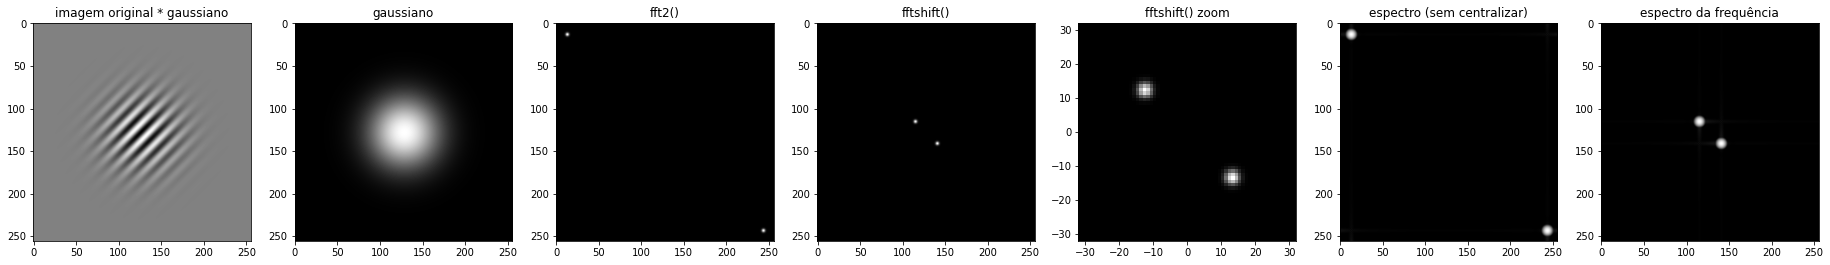

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_map(size_x, size_y, sigma_x, sigma_y):
    """ Gera uma imagem gaussiana.
    Adaptado de: https://gist.github.com/suvojit-0x55aa/fdbaeade2618ac302ec85dfa5f01f9e9
    """
    x = np.arange(0, size_x, dtype=float)
    y = np.arange(0, size_y, dtype=float)[:,np.newaxis]
    x -= (size_x // 2)
    y -= (size_y // 2)
    exp_part = x**2 / (2 * sigma_x**2) + y**2 / (2 * sigma_y**2)
    return 1 / (2 * np.pi * sigma_x * sigma_y) * np.exp(-exp_part)

width = 128
height = 128
freqH = 12.8
freqV = 12.8
zoom = 32
epsilon = 0.000001

# Cria uma imagem de tamanho (2 * width, 2 * height) com períodos freqH e freqV na diagonal.
rows = np.linspace(0, 1, 2 * height)
cols = np.linspace(0, 1, 2 * width)
[x, y] = np.meshgrid(cols, rows)
img = np.sin(freqH * 2 * np.pi * x + freqV * 2 * np.pi * y)

# Cria a imagem gaussiana e multiplica pela imagem original.
gaussian_kernel = gaussian_map(2 * width, 2 * height, width / 4.5, height / 4.5)
img = img * gaussian_kernel

# Converte a imagem para o domínio da frequência (aplica a transformada de Fourier).
fourier = np.fft.fft2(img)

# Centraliza o componente DC, que estava no canto superior esquerdo.
shift = np.fft.fftshift(fourier)

# Transformação logarítmica para obter uma imagem com todas as frequências (espectro da frequência).
# epsilon é usado para evitar divisão por zero.
spectrum_noshift = np.log(np.abs(fourier) + epsilon)
spectrum = np.log(np.abs(shift) + epsilon)

# Exibe as imagens.
fig, axs = plt.subplots(1, 7, figsize=(32, 32))
axs[0].set_title('imagem original * gaussiano')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('gaussiano')
axs[1].imshow(gaussian_kernel, cmap=plt.cm.gray)
axs[2].set_title('fft2()')
axs[2].imshow(np.abs(fourier), cmap=plt.cm.gray)
axs[3].set_title('fftshift()')
axs[3].imshow(np.abs(shift), cmap=plt.cm.gray)
axs[4].set_title('fftshift() zoom')
axs[4].imshow(np.abs(shift)[height-zoom:height+zoom, width-zoom:width+zoom], extent=[-zoom, zoom, -zoom, zoom], cmap=plt.cm.gray)
axs[5].set_title('espectro (sem centralizar)')
axs[5].imshow(spectrum_noshift, cmap=plt.cm.gray)
axs[6].set_title('espectro da frequência')
axs[6].imshow(spectrum, cmap=plt.cm.gray)
plt.show()

Antes de vermos um exemplo que aplica as etapas 5-7 (filtro no domínio da frequência, deslocamento inverso e transformada inversa), o código a seguir cria uma matriz 3x3 com frequências amostradas da DFT, usando a função `np.fft.fftfreq()`.

Com poucos valores, esse exemplo pode ajudar a entender um pouco mais sobre o deslocamento e uso da magnitude/abs para os valores da FT.

[[ 0.          0.11111111  0.22222222]
 [ 0.33333333  0.44444444 -0.44444444]
 [-0.33333333 -0.22222222 -0.11111111]]
[[-0.11111111 -0.33333333 -0.22222222]
 [ 0.22222222  0.          0.11111111]
 [-0.44444444  0.33333333  0.44444444]]
[[0.         0.11111111 0.22222222]
 [0.33333333 0.44444444 0.44444444]
 [0.33333333 0.22222222 0.11111111]]
[[0.11111111 0.33333333 0.22222222]
 [0.22222222 0.         0.11111111]
 [0.44444444 0.33333333 0.44444444]]


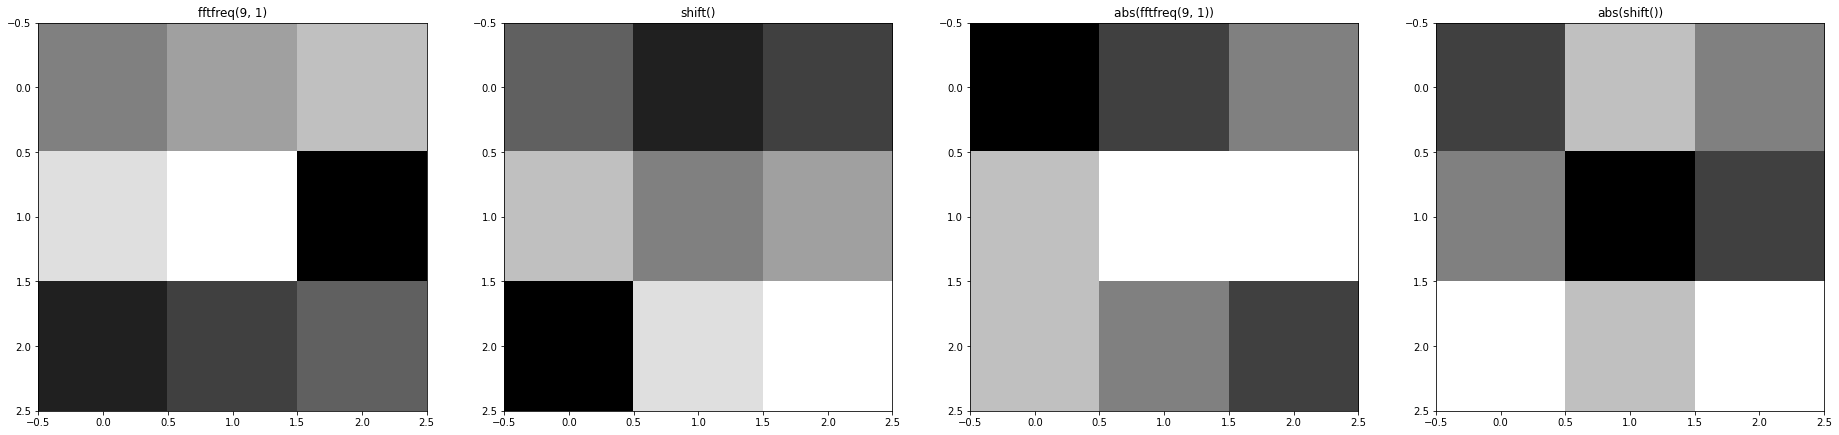

In [6]:
freqs = np.fft.fftfreq(9, 1).reshape(3, 3)
freqs_shift = np.fft.fftshift(freqs)
abs_freqs = np.abs(freqs)
abs_freqs_shift = np.abs(freqs_shift)
print(freqs)
print(freqs_shift)
print(abs_freqs)
print(abs_freqs_shift)

fig, axs = plt.subplots(1, 4, figsize=(32, 32))
axs[0].set_title('fftfreq(9, 1)')
axs[0].imshow(freqs, cmap=plt.cm.gray)
axs[1].set_title('shift()')
axs[1].imshow(freqs_shift, cmap=plt.cm.gray)
axs[2].set_title('abs(fftfreq(9, 1))')
axs[2].imshow(abs_freqs, cmap=plt.cm.gray)
axs[3].set_title('abs(shift())')
axs[3].imshow(abs_freqs_shift, cmap=plt.cm.gray)
plt.show()

## **FT com imagem carregada de arquivos**

Nos próximos exemplos, veremos a FT aplicada em uma foto que é carregada de um arquivo de imagem, incluindo a aplicação de filtros no domínio da frequência.

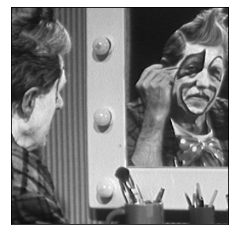

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

filename = 'picture.gif'
img = io.imread(filename, as_gray=True)

plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.show()

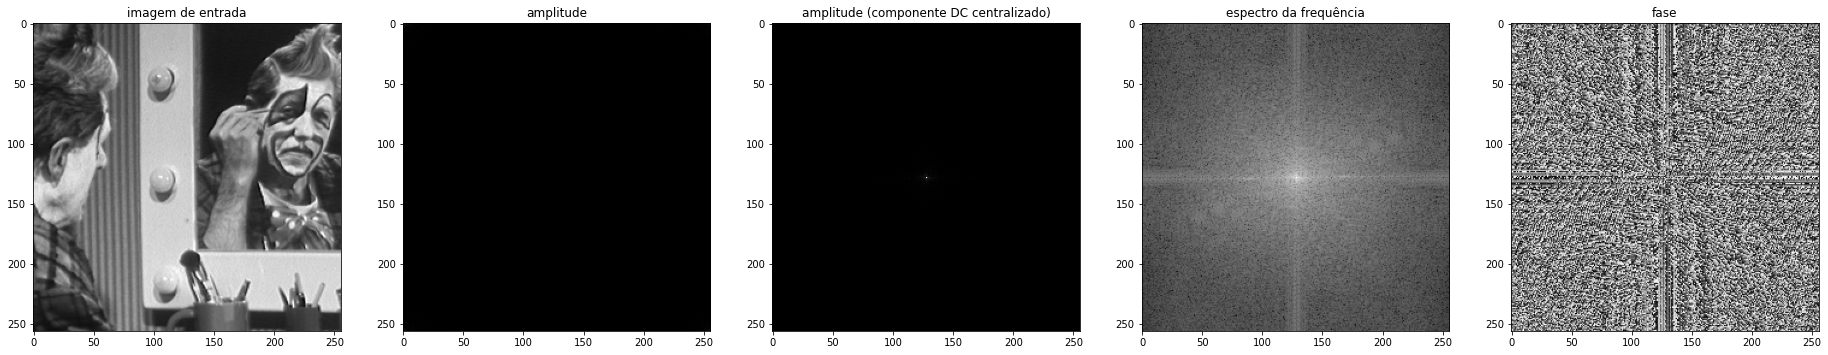

In [8]:
# Transformada de Fourier.

fourier = np.fft.fft2(img) # Converte a imagem para o domínio da frequência (aplica a transformada de Fourier).
amplitude = np.abs(fourier) # fourier é um número complexo, np.abs() obtém a amplitude.
amplitude_shift = np.abs(np.fft.fftshift(fourier)) # Centralizamos o componente DC.
phase = np.angle(fourier) # np.angle() retorna o ângulo de um número complexo (obtém a fase).
phase_shift = np.fft.fftshift(phase) # Centralizamos o componente DC.
# Transformação logarítmica para obter uma imagem com todas as frequências (espectro da frequência).
# epsilon é usado para evitar divisão por zero.
epsilon = 0.000001
magnitude = np.log(np.abs(amplitude_shift) + epsilon)

# Exibe as imagens.
fig, axs = plt.subplots(1, 5, figsize=(32, 32))
axs[0].set_title('imagem de entrada')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('amplitude')
axs[1].imshow(amplitude, cmap=plt.cm.gray)
axs[2].set_title('amplitude (componente DC centralizado)')
axs[2].imshow(amplitude_shift, cmap=plt.cm.gray)
axs[3].set_title('espectro da frequência')
axs[3].imshow(magnitude, cmap=plt.cm.gray)
axs[4].set_title('fase')
axs[4].imshow(phase_shift, cmap=plt.cm.gray)
plt.show()

### **Filtro passa baixa no domínio da frequência**

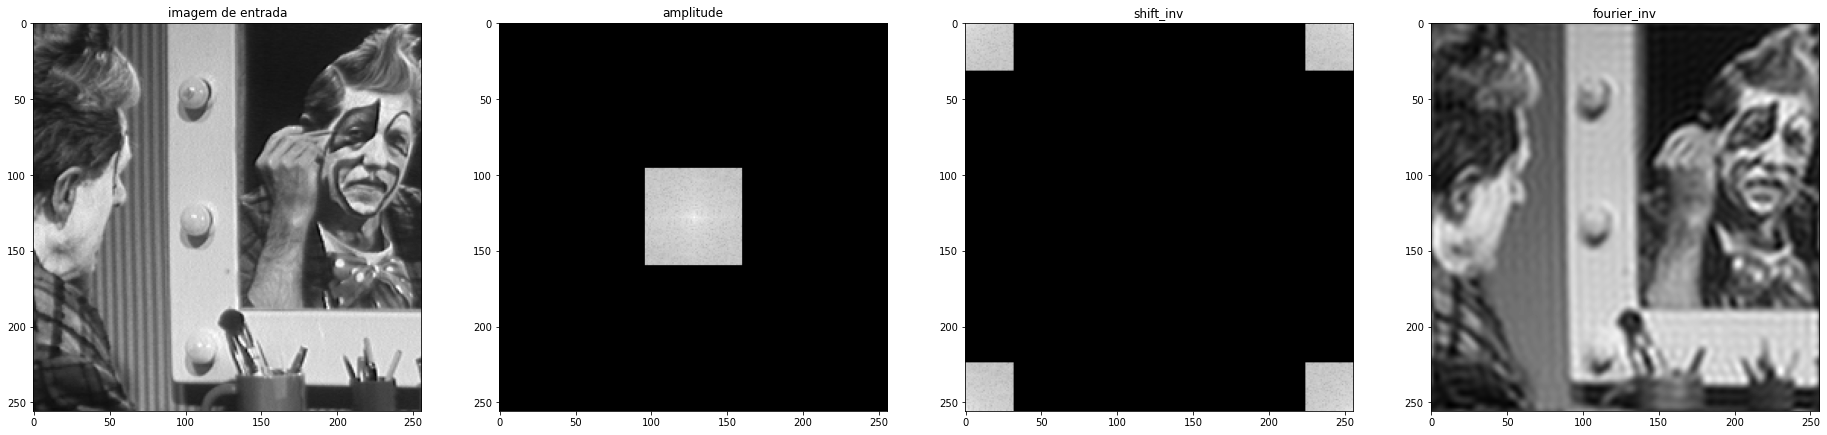

In [9]:
# Filtro passa baixa no domínio da frequência.

fourier = np.fft.fft2(img)
shift = np.fft.fftshift(fourier)
height, width = np.abs(fourier).shape
epsilon = 0.000001

amplitude = shift

# Aplica um filtro passa baixa no domínio da frequência.
box_size = 96
amplitude[0:box_size, 0:width] = 0
amplitude[0:height, 0:box_size] = 0
amplitude[height-box_size:height, 0:width] = 0
amplitude[0:height, width-box_size:width] = 0

# Faz o deslocamento inverso, voltando o componente DC para o canto superior esquerdo da imagem.
shift_inv = np.fft.ifftshift(amplitude)

# Faz a transformada inversa de Fourier, obtendo a imagem original filtrada.
fourier_inv = np.fft.ifft2(shift_inv)

# Exibe as imagens.
fig, axs = plt.subplots(1, 4, figsize=(32, 32))
axs[0].set_title('imagem de entrada')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('amplitude')
axs[1].imshow(np.log(np.abs(amplitude) + epsilon), cmap=plt.cm.gray)
axs[2].set_title('shift_inv')
axs[2].imshow(np.log(np.abs(shift_inv) + epsilon), cmap=plt.cm.gray)
axs[3].set_title('fourier_inv')
axs[3].imshow(np.abs(fourier_inv), cmap=plt.cm.gray)
plt.show()

### **Filtro passa alta no domínio da frequência**

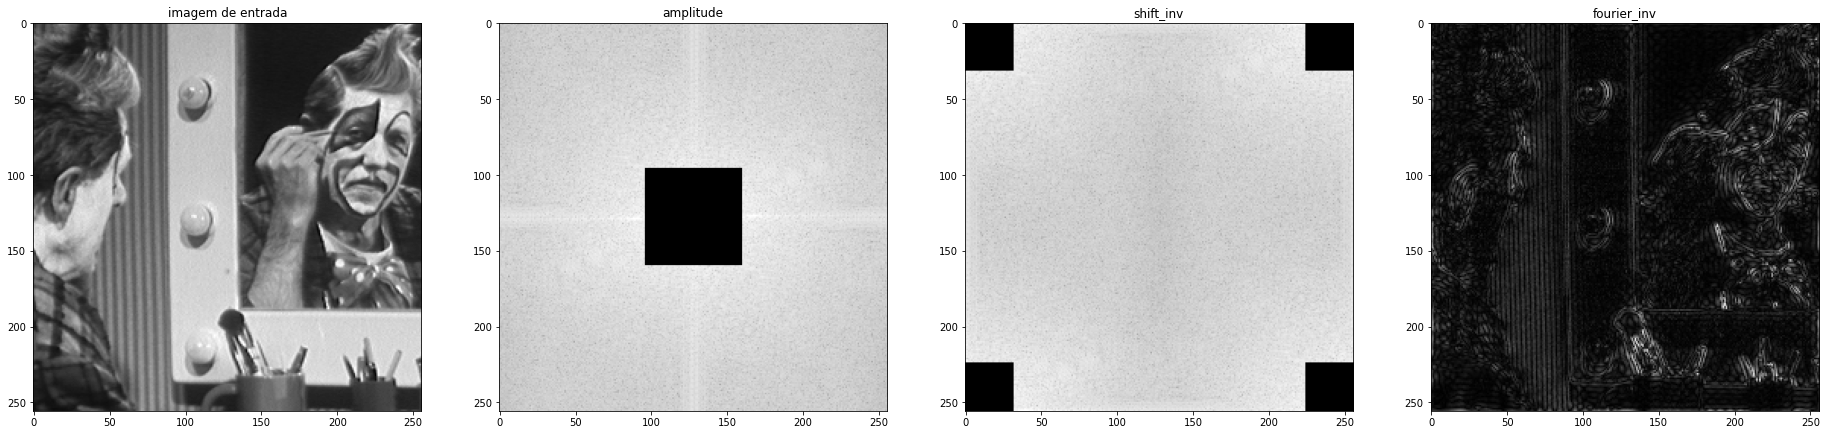

In [10]:
# Filtro passa alta no domínio da frequência.

fourier = np.fft.fft2(img)
shift = np.fft.fftshift(fourier)
height, width = np.abs(fourier).shape
height_half = int(height / 2)
width_half = int(width / 2)
epsilon = 0.000001

amplitude = shift

# Aplica um filtro passa alta no domínio da frequência.
box_size = 32
amplitude[height_half-box_size:height_half+box_size, width_half-box_size:width_half+box_size] = 0

# Faz o deslocamento inverso, voltando o componente DC para o canto superior esquerdo da imagem.
shift_inv = np.fft.ifftshift(amplitude)

# Faz a transformada inversa de Fourier, obtendo a imagem original filtrada.
fourier_inv = np.fft.ifft2(shift_inv)

# Exibe as imagens.
fig, axs = plt.subplots(1, 4, figsize=(32, 32))
axs[0].set_title('imagem de entrada')
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('amplitude')
axs[1].imshow(np.log(np.abs(amplitude) + epsilon), cmap=plt.cm.gray)
axs[2].set_title('shift_inv')
axs[2].imshow(np.log(np.abs(shift_inv) + epsilon), cmap=plt.cm.gray)
axs[3].set_title('fourier_inv')
axs[3].imshow(np.abs(fourier_inv), cmap=plt.cm.gray)
plt.show()

# **Exercícios**

**Observação**: *Ao enviar as alterações com sua solução final no repositório git, certifique-se que o notebook está com todas as saídas executadas, de forma que, ao abrir o arquivo no GitHub (navegador), todas as saídas estarão visíveis.*

## **Exercício 1**

Uma das propriedades da dualidade (sobre domínio espacial e domínio da frequência) diz que a convolução de duas funções no domínio espacial (aplicação de filtro em uma imagem) é uma multiplicação no domínio da frequência.

Sabendo disso, aplique um filtro gaussiano no domínio da frequência na imagem usada nos exemplos deste material (arquivo `picture.gif`). Você também pode aproveitar a função `gaussian_map()` que apareceu neste material para criar uma imagem gaussiana, que servirá como o kernel.

In [ ]:
# TODO: *** Implementar o exercício 1. ***

## **Exercício 2**

Pesquise como é possível aplicar filtros no domínio da frequência para que certos ruídos (periódicos) sejam removidos de uma imagem.

Em seguida, implemente sua solução para que, aplicando filtros no domínio da frequência, você consiga remover / reduzir o ruído das seguintes imagens:

![moonlanding.png](moonlanding.png)

`moonlanding.png`


![football.png](football.png)

`football.png`


![photo.png](photo.png)

`photo.png`